## Potat Disease Classification

#### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy

In [2]:
print(tf.__version__)

2.12.0


## Import data into tensorflow dataset object

#### Used splitfolders tool to split dataset into training, validation and test directories.
#### $ pip install split-folders

#### $ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    '../dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
 #         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.66816586 0.6603227  0.7152247 ]
  [0.68925524 0.6814121  0.73631406]
  [0.69899774 0.6911546  0.74605656]
  ...
  [0.59305197 0.58128726 0.6479539 ]
  [0.5941036  0.58233887 0.64900553]
  [0.59515524 0.58339053 0.6500572 ]]

 [[0.66764003 0.6597969  0.71469885]
  [0.68820363 0.6803605  0.73526245]
  [0.7000494  0.69220626 0.7471082 ]
  ...
  [0.6276771  0.6159124  0.68257904]
  [0.6291231  0.6173584  0.68402505]
  [0.6305691  0.6188044  0.68547106]]

 [[0.66711426 0.6592711  0.7141731 ]
  [0.68715197 0.67930883 0.7342108 ]
  [0.70110106 0.6932579  0.7481599 ]
  ...
  [0.66535074 0.65358603 0.7202527 ]
  [0.6661395  0.6543748  0.72104144]
  [0.6669282  0.65516347 0.7218302 ]]

 ...

 [[0.4507189  0.4350326  0.50169927]
  [0.45150763 0.43582135 0.5024881 ]
  [0.45229635 0.43661007 0.50327677]
  ...
  [0.47951925 0.46383297 0.51873493]
  [0.4586109  0.44292462 0.49782658]
  [0.42551675 0.40983048 0.46473244]]

 [[0.47937226 0.463686   0.5303527 ]
  [0.48042393 0.46473765 0.5314043 ]


In [8]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
validation_generator = validation_datagen.flow_from_directory(
    '../dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
    '../dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7893631  0.7775984  0.8207357 ]
  [0.7580169  0.7462522  0.78938943]
  [0.73309237 0.72132766 0.7644649 ]
  ...
  [0.6414932  0.6218853  0.64541477]
  [0.6558649  0.63625705 0.65978646]
  [0.6702367  0.65062886 0.6741583 ]]

 [[0.7927165  0.7809518  0.82408905]
  [0.76232845 0.75056374 0.793701  ]
  [0.73500854 0.72324383 0.7663811 ]
  ...
  [0.7101981  0.69059026 0.7141197 ]
  [0.7034913  0.6838834  0.70741284]
  [0.69678444 0.6771766  0.700706  ]]

 [[0.79607    0.7843053  0.8274425 ]
  [0.76663995 0.75487524 0.7980125 ]
  [0.7369248  0.7251601  0.7682974 ]
  ...
  [0.68759507 0.66586137 0.69151664]
  [0.69526    0.6725682  0.69918156]
  [0.70292497 0.67927504 0.70684654]]

 ...

 [[0.7662449  0.75840175 0.7623233 ]
  [0.7695983  0.76175517 0.76567674]
  [0.7729517  0.7651086  0.76903015]
  ...
  [0.61004156 0.5904337  0.6139631 ]
  [0.599803   0.5801951  0.60372454]
  [0.67615396 0.6565461  0.6800755 ]]

 [[0.7841345  0.7762914  0.78021294]
  [0.78509265 0.7772495  0.7811711 ]


## Building the model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model

#### We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 44s 918ms/step - loss: 0.9298 - accuracy: 0.4579 - val_loss: 0.9185 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 35s 747ms/step - loss: 0.8405 - accuracy: 0.5387 - val_loss: 0.7992 - val_accuracy: 0.5677
Epoch 3/20
47/47 [==============================] - 36s 755ms/step - loss: 0.6334 - accuracy: 0.7123 - val_loss: 0.6466 - val_accuracy: 0.7083
Epoch 4/20
47/47 [==============================] - 36s 759ms/step - loss: 0.4759 - accuracy: 0.7754 - val_loss: 0.8289 - val_accuracy: 0.5885
Epoch 5/20
47/47 [==============================] - 36s 767ms/step - loss: 0.3189 - accuracy: 0.8874 - val_loss: 0.2476 - val_accuracy: 0.8854
Epoch 6/20
47/47 [==============================] - 36s 762ms/step - loss: 0.1958 - accuracy: 0.9261 - val_loss: 0.1334 - val_accuracy: 0.9583
Epoch 7/20
47/47 [==============================] - 36s 761ms/step - loss: 0.1981 - accuracy: 0.9362 - val_loss: 0.1418 - val_accuracy: 0.9635

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 7s 492ms/step - loss: 0.1264 - accuracy: 0.9559


In [18]:
# Scores is just a list containing loss and accuracy value
scores

[0.1264054775238037, 0.9559164643287659]

### Plotting the Accuracy and Loss Curves

In [19]:
history

#### You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9298350214958191,
 0.8404970169067383,
 0.6334484219551086,
 0.4758795499801636,
 0.3189472556114197]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
acc

[0.4579375982284546,
 0.5386703014373779,
 0.7123473286628723,
 0.7754409909248352,
 0.8873812556266785,
 0.9260515570640564,
 0.9362279772758484,
 0.9158751964569092,
 0.9477611780166626,
 0.9721845388412476,
 0.9681139588356018,
 0.9748982191085815,
 0.9769335389137268,
 0.9660786986351013,
 0.9782903790473938,
 0.9864314794540405,
 0.9518317580223083,
 0.9810040593147278,
 0.9864314794540405,
 0.985753059387207]

In [26]:
val_acc

[0.4791666567325592,
 0.5677083134651184,
 0.7083333134651184,
 0.5885416865348816,
 0.8854166865348816,
 0.9583333134651184,
 0.9635416865348816,
 0.9270833134651184,
 0.96875,
 0.9791666865348816,
 0.9739583134651184,
 0.9739583134651184,
 0.984375,
 0.9479166865348816,
 0.9791666865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9895833134651184,
 0.9375]

Text(0.5, 1.0, 'Training and Validation Loss')

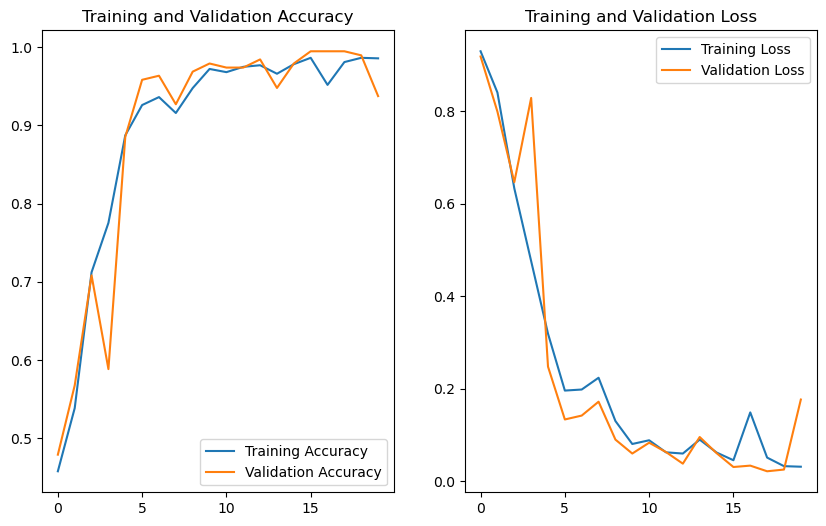

In [27]:
EPOCHS = 20

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

### Run prediction on sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 225ms/step
predicted label: Potato___healthy


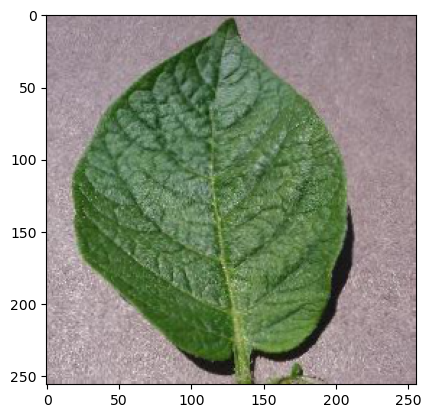

In [28]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = label_batch[0]

    print('first image to predict')
    plt.imshow(first_image)
    print(f'actual label: {class_names[int(first_label)]}')

    batch_prediction = model.predict(image_batch)
    print(f'predicted label: {class_names[np.argmax(batch_prediction[0])]}')

    break

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Now run inference on few sample images

1/1 [==============================] - 0s 31ms/step


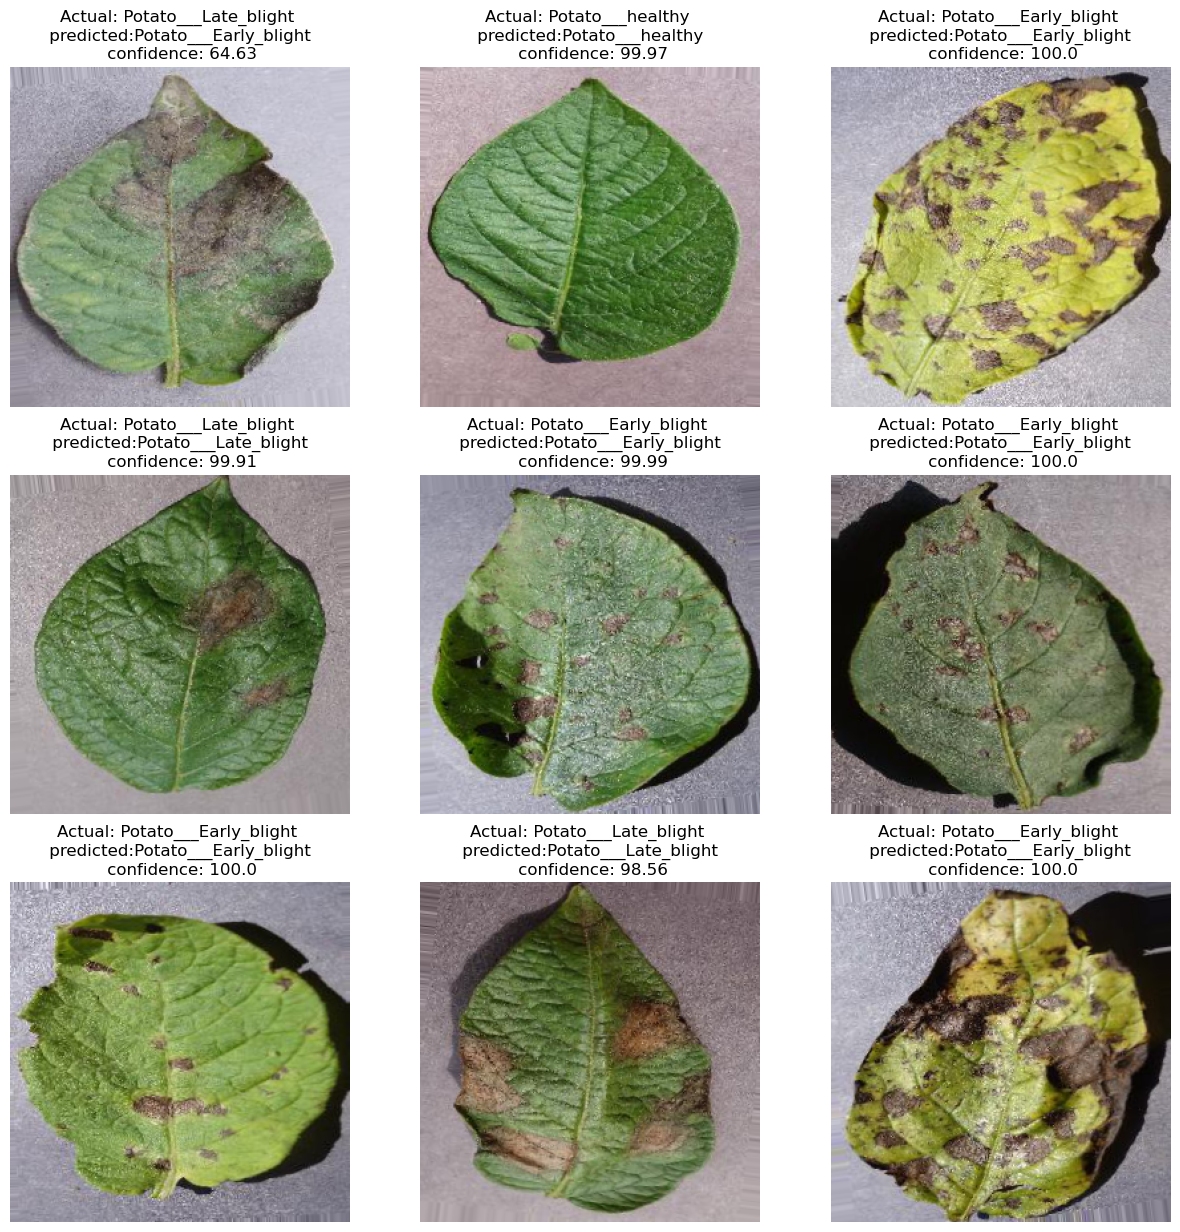

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class} \n predicted:{predicted_class} \n confidence: {confidence}")
        plt.axis("off")

    break

## Saving the Model
#### Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [31]:
model.save("../models/potatoes.h5")